In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import numpy as np

# Cancer Inhibitors dataset
Following dataset is coming from https://www.kaggle.com/xiaotawkaggle/inhibitors

On Leho there is an adapted csv of the cdk2.h5 dataset. The adaptations I already did for you was extracting the data out of the .h5 file. Renaming the columns, add in the IDs of each of the compounds (row names) and combine it with the target into a .csv file.

For cdk2, 1890 potential inhibitors are collected from chembl database, in which molecules with IC50 lower than 10 uM are usually considered as inhibitors, otherwise non-inhibitors.

The rownames represent the CHEMBL Id, which can be used to search the CHEMBL database: https://www.ebi.ac.uk/chembl/

The features are split into 3 categories that represent three different sets of molecular fingerprints calculated by RDKIT. For more information: http://www.rdkit.org/docs/GettingStartedInPython.html#topological-fingerprints
* ap: Atom Pairs
* mg: Morgan Fingerprints (Circular Fingerprints)
* tt: Topological Torsions

The actual values represent if a molecular fingerprint is present in a specific molecule or not (1: present, 0: not present)

The target column indicated if the molecule is considered an inhibitor or not.

In [5]:
# Read in the data, because we have row names in our dataset, use pd.read_csv('filename.csv',index_col=0)
data = pd.read_csv("data/cdk2.csv", index_col=0)
# Take a look at the first rows of the dataframe
data.head(10)

,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,ap_9,ap_10,...,tt_2031,tt_2032,tt_2033,tt_2034,tt_2035,tt_2036,tt_2037,tt_2038,tt_2039,target
CHEMBL405042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL258805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL318485,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CHEMBL260417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL101557,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CHEMBL48614,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL72510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL411426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL101558,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CHEMBL260103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Take a look at the number of rows and columns in the dataframe
data.shape

(1890, 6118)

<AxesSubplot: xlabel='target', ylabel='count'>

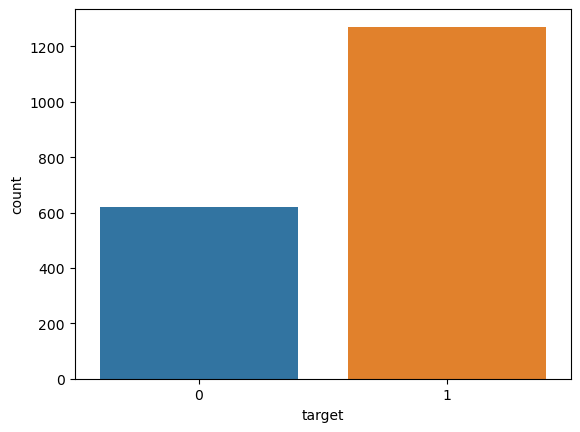

In [8]:
# Plot the counts of the target column using  a seaborn countplot
sns.countplot(data=data, x="target")

<AxesSubplot: xlabel='ap_1', ylabel='count'>

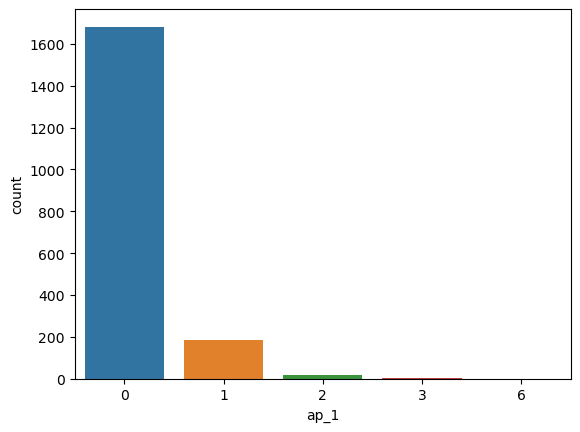

In [9]:
# Plot a countplot of the first feature column (ap_1)
sns.countplot(data=data, x="ap_1")

**What is noteworthy of the plot above?**



**Notes:**
Due to the amount of columns, a df.describe() will not show you a lot of information.

Pairplots and corrplots would be gigantic and also not very informative due to it being sparse data.

Removing outliers would not be a good idea, since a lot of the values that are different from 0 would already be considered outliers, whilst these are just the informative things.
    

In [11]:
# Split into features and targets
X = data.drop("target", axis = 1)
y = data.target

In [12]:
# Split into training and test set. Keep +-20% as a test_set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 17)

In [25]:
# Create a multinomial naive bayes classifier
NBmodel = MultinomialNB(alpha=5)

# Fit the model
# Fit the training data
NBmodel.fit(X_train,y_train)

# Show the score of the test data
print(f" Training model score: {NBmodel.score(X_train, y_train)}")
print(f" Test model score: {NBmodel.score(X_test, y_test)}")

#print(NBmodel.predict_proba(X_test))

 Training model score: 0.794973544973545
 Test model score: 0.7354497354497355


[[ 94  26]
 [ 74 184]]


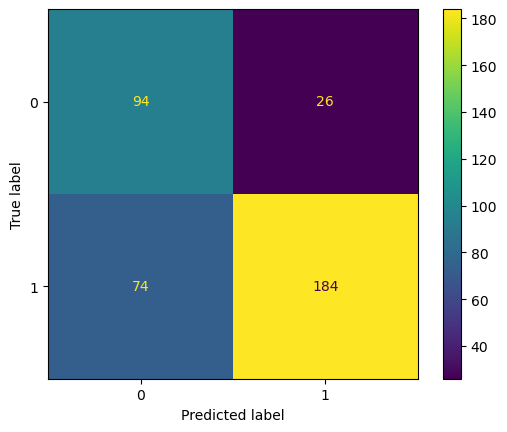

              precision    recall  f1-score   support

           0       0.56      0.78      0.65       120
           1       0.88      0.71      0.79       258

    accuracy                           0.74       378
   macro avg       0.72      0.75      0.72       378
weighted avg       0.78      0.74      0.74       378



In [33]:
# Predict values for the test set
y_test_pred = NBmodel.predict(X_test)

# Print a confusion matrix and classification report
print(confusion_matrix(y_test,y_test_pred))

cf = confusion_matrix(y_test,y_test_pred)
matrix = ConfusionMatrixDisplay(cf)
matrix.plot()
plt.show()

print(classification_report(y_test,y_test_pred))

Train score: 0.9993386243386243
Test score: 0.9993386243386243
[[ 89  31]
 [ 22 236]]


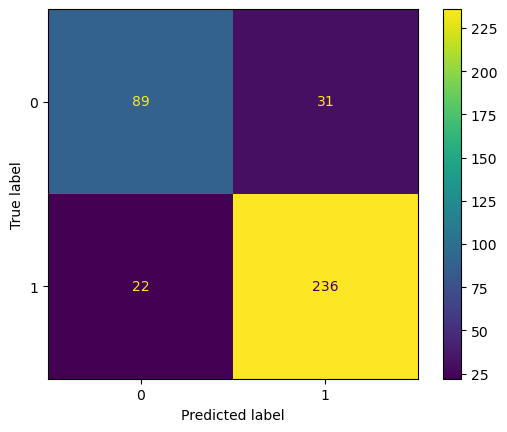

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       120
           1       0.88      0.91      0.90       258

    accuracy                           0.86       378
   macro avg       0.84      0.83      0.83       378
weighted avg       0.86      0.86      0.86       378



In [37]:
# Train a logistic regression model on the data and test it as you did for the naive bayes model
LogModel = LogisticRegression(penalty="l2", C = 5, class_weight= "balanced", solver = 'newton-cg')

LogModel.fit(X_train,y_train)

print(f"Train score: {LogModel.score(X_train,y_train)}")
print(f"Test score: {LogModel.score(X_train,y_train)}")

y_test_pred = LogModel.predict(X_test)

# Print a confusion matrix and classification report
print(confusion_matrix(y_test,y_test_pred))

cf = confusion_matrix(y_test,y_test_pred)
matrix = ConfusionMatrixDisplay(cf)
matrix.plot()
plt.show()

print(classification_report(y_test,y_test_pred))

Also try and play with the hyperparameters a bit

## Conclusion
**What can we conclude regarding the metrics of both models**
THe metrics for the Naive Bayes classification has a far worse score then the logistic regression score. The Logistisc regression model with hyperparameter tuning has a significantly higher score and better performance

**What can we conclude regarding the time it takes to train the model?**
The LogisticRegr takes much more tim due to also the hyperparameter tuning then the NB which is quite fast trained model. 


# MNIST dataset
MNIST is the "hello world" of AI.

MNIST is a dataset containing a lot of handwritten digits. The goal is to correctly identify the written digit from the image. There is a lot of different sets and subsets available online. The data that we will be using is coming from
https://www.kaggle.com/c/digit-recognizer/data

Each image contains 28x28 pixels => 784 values between 0 (black) and 255 (white)

Some initial code is given as to show you how to display the images

In [38]:
# Read in the dataset
df = pd.read_csv("data/MNIST.csv")

In [39]:
# Take a look at the first rows of the dataset
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='label', ylabel='count'>

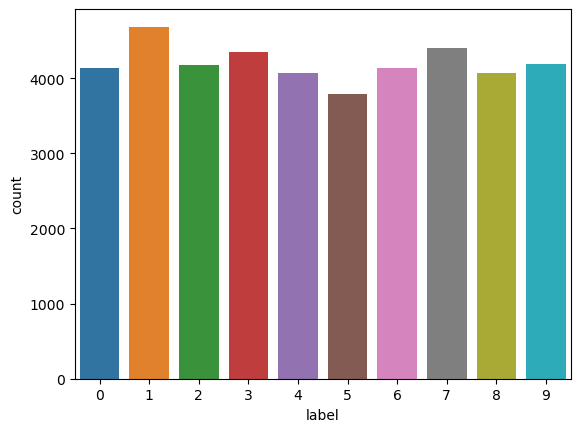

In [40]:
# Countplot of the numbers
sns.countplot(x="label",data=df)

In [41]:
# Split into features and targets
X = df.drop("label",axis=1)
y = df.label

Label: 4


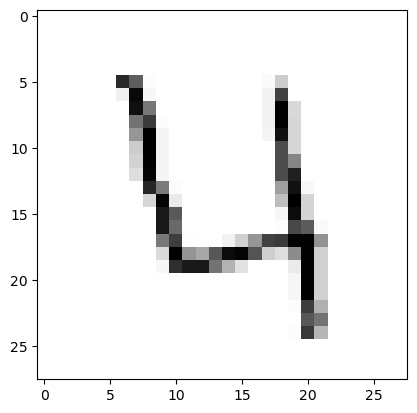

In [42]:
# Change this value to see another sample
row_num_X = 3

# Extract the image from X
single_image= X.iloc[row_num_X,:]  ## Row row_num_X, column all (:)

# Convert the single array of 784 pixels into nested arrays as to creat a 28x28 array
# [p0,p1,p2,p3,...,p784] becomes

# [[p0,p1,p2,p3,...,p27]
#  [p28,p29,p30,    ...]
#  ...
#  [          ..., p783]]
single_image_to_28x28 = single_image.values.reshape(28,28)

# Show the image
plt.imshow(single_image_to_28x28,cmap='Greys')
# Also print the corresponding label
print(f"Label: {y[row_num_X]}")

In [43]:
# Split into training and test set. Keep +-20% as a test_set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 24)

In [44]:
# Train a multinomial naive bayes model on the data and test it using the test data
ModelNB = MultinomialNB(alpha=1)

ModelNB.fit(X_train,y_train)

print(f"Train score: {ModelNB.score(X_train,y_train)}")
print(f"Test score: {ModelNB.score(X_test,y_test)}")

Train score: 0.825654761904762
Test score: 0.8320238095238095


[[749   1   7   1   2  12  10   0  34   2]
 [  0 878   6   3   0   5   3   0  52   3]
 [ 13  10 702  16   7   0  39   6  48   2]
 [  4  14  31 737   0  14  11  12  51  28]
 [  3   2   7   1 615   3  19   5  35 130]
 [ 19   5   9 102  17 487  12   2  72  21]
 [  5  12  11   0   8  13 760   0   5   0]
 [  5  18   9   3  20   1   0 747  33  74]
 [  4  36   7  44   6  29   5   1 589  25]
 [  3   4   1  10  53   3   0  22  30 725]]


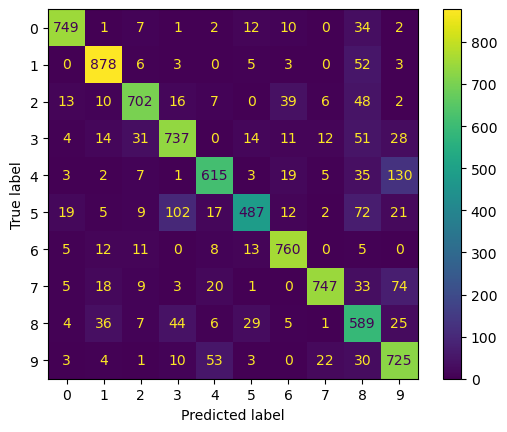

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       818
           1       0.90      0.92      0.91       950
           2       0.89      0.83      0.86       843
           3       0.80      0.82      0.81       902
           4       0.84      0.75      0.79       820
           5       0.86      0.65      0.74       746
           6       0.88      0.93      0.91       814
           7       0.94      0.82      0.88       910
           8       0.62      0.79      0.69       746
           9       0.72      0.85      0.78       851

    accuracy                           0.83      8400
   macro avg       0.84      0.83      0.83      8400
weighted avg       0.84      0.83      0.83      8400



In [46]:
# Predict values for the test set
y_pred_test = ModelNB.predict(X_test)
# Print a confusion matrix and classification report
print(confusion_matrix(y_test,y_pred_test))

cf = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf)
matrix.plot()
plt.show()

print(classification_report(y_test,y_pred_test))

/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Train score: 0.9600297619047619
Test score: 0.9600297619047619
[[753   0  11   4   6  20  14   4   2   4]
 [  0 907   7   2   2   4   1   3  21   3]
 [ 10  16 736  22   7   7  11  14  16   4]
 [  8   3  19 783   1  37   5  10  21  15]
 [  4   3  15   4 730   3  12   9  10  30]
 [  9   7   9  30  12 639  13   2  15  10]
 [ 10   5  20   0  14   9 753   0   2   1]
 [  3   8  14   5  11   1   0 832   2  34]
 [  7  19  14  18   2  24   5   4 643  10]
 [  4   5   2   9  31   7   0  20   6 767]]


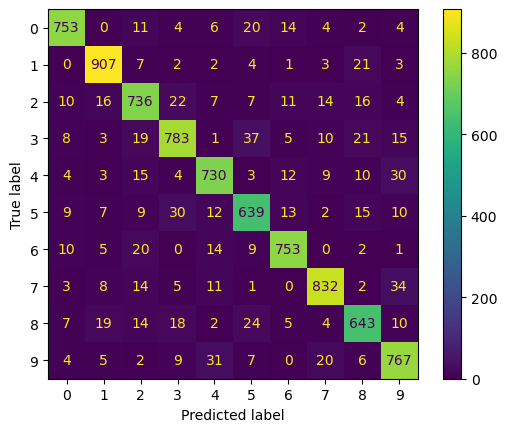

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       818
           1       0.93      0.95      0.94       950
           2       0.87      0.87      0.87       843
           3       0.89      0.87      0.88       902
           4       0.89      0.89      0.89       820
           5       0.85      0.86      0.85       746
           6       0.93      0.93      0.93       814
           7       0.93      0.91      0.92       910
           8       0.87      0.86      0.87       746
           9       0.87      0.90      0.89       851

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [47]:
# Also try it using a logistic regression model
# Train a logistic regression model on the data and test it as you did for the naive bayes model
LogModel = LogisticRegression(penalty="l2", C = 5, class_weight= "balanced", solver = 'newton-cg')

LogModel.fit(X_train,y_train)

print(f"Train score: {LogModel.score(X_train,y_train)}")
print(f"Test score: {LogModel.score(X_train,y_train)}")

y_test_pred = LogModel.predict(X_test)

# Print a confusion matrix and classification report
print(confusion_matrix(y_test,y_test_pred))

cf = confusion_matrix(y_test,y_test_pred)
matrix = ConfusionMatrixDisplay(cf)
matrix.plot()
plt.show()

print(classification_report(y_test,y_test_pred))

Following code let's you draw a number and predict it using your model

The model should be called 'model' or be renamed in the code below

Note that you need packages pillow and tkinter

`conda install pillow tk` or `pip3 install pillow tk` or `sudo dnf install python3-pillow python3-tkinter`

In [ ]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 280  # canvas width
height = 280 # canvas height
center = height//2
white = (255) # canvas back

def predict():
    op2 = PIL.ImageChops.invert(output_image)
    op2=op2.resize((28,28),resample=3)
    # Show the image
    plt.imshow(op2,cmap='Greys')
    op2_array = np.asarray(op2).reshape(1,-1)
    print(model.predict(op2_array))
    
def clear():
    plt.close()
    canvas.delete("all")
    draw.rectangle((0,0,width,height),fill=255)
    
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=25)
    draw.line([x1, y1, x2, y2],fill="black",width=25)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="predict",command=predict)
button.pack()
button=Button(text="clear",command=clear)
button.pack()

master.mainloop()